### Objective: To analyse the provided data set to find out driving factors behind a loan default

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

In [3]:
#Reading the csv file
data  = pd.read_csv("loan.csv")
df = data.copy()  #Making a copy of the data to work with
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


**Only rows with "Charged Off" and "Fully paid" as loan status are required for analysis, therefore subsetting the dataframe**

In [5]:
df = df[df["loan_status"]!="Current"]

In [6]:
df.shape

(38577, 111)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.0+ MB


In [8]:
df.columns = [i.capitalize() for i in df.columns]

## DATA CLEANING

In [9]:
#total missing values in each column
((df.isna().sum().head(60)/len(df.index))*100).round(2)

Id                               0.00
Member_id                        0.00
Loan_amnt                        0.00
Funded_amnt                      0.00
Funded_amnt_inv                  0.00
Term                             0.00
Int_rate                         0.00
Installment                      0.00
Grade                            0.00
Sub_grade                        0.00
Emp_title                        6.19
Emp_length                       2.68
Home_ownership                   0.00
Annual_inc                       0.00
Verification_status              0.00
Issue_d                          0.00
Loan_status                      0.00
Pymnt_plan                       0.00
Url                              0.00
Desc                            32.47
Purpose                          0.00
Title                            0.03
Zip_code                         0.00
Addr_state                       0.00
Dti                              0.00
Delinq_2yrs                      0.00
Earliest_cr_

In [10]:
((df.isna().sum().head(51)/len(df.index))*100).round(2)

Id                               0.00
Member_id                        0.00
Loan_amnt                        0.00
Funded_amnt                      0.00
Funded_amnt_inv                  0.00
Term                             0.00
Int_rate                         0.00
Installment                      0.00
Grade                            0.00
Sub_grade                        0.00
Emp_title                        6.19
Emp_length                       2.68
Home_ownership                   0.00
Annual_inc                       0.00
Verification_status              0.00
Issue_d                          0.00
Loan_status                      0.00
Pymnt_plan                       0.00
Url                              0.00
Desc                            32.47
Purpose                          0.00
Title                            0.03
Zip_code                         0.00
Addr_state                       0.00
Dti                              0.00
Delinq_2yrs                      0.00
Earliest_cr_

In [11]:
#Removing columns with 100% missing values
df.dropna(how = "all",inplace=True,axis = 1)

In [12]:
df.head()

,Id,Member_id,Loan_amnt,Funded_amnt,Funded_amnt_inv,Term,Int_rate,Installment,Grade,Sub_grade,...,Last_pymnt_amnt,Last_credit_pull_d,Collections_12_mths_ex_med,Policy_code,Application_type,Acc_now_delinq,Chargeoff_within_12_mths,Delinq_amnt,Pub_rec_bankruptcies,Tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [13]:
df.shape

(38577, 56)

Removing following types of variables that do not contribute to the analysis:
>-  Details of the borrowers like id, address,zip code etc.
>-  Variables that are applicable post loan default
>-  Variables that are applicable after the loan is granted
>-  Customer behaviour related variables
>-  Variables having a single value for the whole dataset - public policy, application type, payment plan

In [14]:
df.drop(["Id","Member_id","Loan_amnt","Funded_amnt_inv","Url","Desc","Zip_code","Addr_state","Mths_since_last_delinq","Pymnt_plan","Initial_list_status",
"Out_prncp_inv","Total_pymnt_inv","Total_rec_prncp","Total_rec_int","Total_rec_late_fee","Collection_recovery_fee","Collections_12_mths_ex_med","Policy_code",
"Application_type","Chargeoff_within_12_mths","Acc_now_delinq","Delinq_amnt","Pub_rec","Revol_util","Open_acc","Tax_liens","Mths_since_last_record","Out_prncp","Recoveries","Emp_title","Last_pymnt_d","Last_pymnt_amnt","Last_credit_pull_d","Revol_bal","Earliest_cr_line","Delinq_2yrs","Total_acc","Title","Total_pymnt"],axis=1,inplace = True)       


In [15]:
df.head()

,Funded_amnt,Term,Int_rate,Installment,Grade,Sub_grade,Emp_length,Home_ownership,Annual_inc,Verification_status,Issue_d,Loan_status,Purpose,Dti,Inq_last_6mths,Pub_rec_bankruptcies
0,5000,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,1,0.0
1,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,5,0.0
2,2400,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,2,0.0
3,10000,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,1,0.0
5,5000,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,11.20,3,0.0


In [16]:
df.shape

(38577, 16)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Funded_amnt           38577 non-null  int64  
 1   Term                  38577 non-null  object 
 2   Int_rate              38577 non-null  object 
 3   Installment           38577 non-null  float64
 4   Grade                 38577 non-null  object 
 5   Sub_grade             38577 non-null  object 
 6   Emp_length            37544 non-null  object 
 7   Home_ownership        38577 non-null  object 
 8   Annual_inc            38577 non-null  float64
 9   Verification_status   38577 non-null  object 
 10  Issue_d               38577 non-null  object 
 11  Loan_status           38577 non-null  object 
 12  Purpose               38577 non-null  object 
 13  Dti                   38577 non-null  float64
 14  Inq_last_6mths        38577 non-null  int64  
 15  Pub_rec_bankruptcie

In [18]:
#Extracting the year of loan issuance
df["Issue_Year"] = df["Issue_d"].apply(lambda x:"20" + x[-2:])

In [19]:
#Extracting the month of loan issuance
df["Issue_Month"] = df["Issue_d"].apply(lambda x:x[0:3])

In [20]:
#Removing the issue_d column as it is no longer needed
#df.drop("Issue_d",inplace =True,axis=1)

In [21]:
df.head()

,Funded_amnt,Term,Int_rate,Installment,Grade,Sub_grade,Emp_length,Home_ownership,Annual_inc,Verification_status,Issue_d,Loan_status,Purpose,Dti,Inq_last_6mths,Pub_rec_bankruptcies,Issue_Year,Issue_Month
0,5000,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,1,0.0,2011,Dec
1,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,5,0.0,2011,Dec
2,2400,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,2,0.0,2011,Dec
3,10000,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,1,0.0,2011,Dec
5,5000,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,11.20,3,0.0,2011,Dec


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Funded_amnt           38577 non-null  int64  
 1   Term                  38577 non-null  object 
 2   Int_rate              38577 non-null  object 
 3   Installment           38577 non-null  float64
 4   Grade                 38577 non-null  object 
 5   Sub_grade             38577 non-null  object 
 6   Emp_length            37544 non-null  object 
 7   Home_ownership        38577 non-null  object 
 8   Annual_inc            38577 non-null  float64
 9   Verification_status   38577 non-null  object 
 10  Issue_d               38577 non-null  object 
 11  Loan_status           38577 non-null  object 
 12  Purpose               38577 non-null  object 
 13  Dti                   38577 non-null  float64
 14  Inq_last_6mths        38577 non-null  int64  
 15  Pub_rec_bankruptcie

In [23]:
# Checking the percentage of remaining missing values
((df.isna().sum()/len(df.index))*100).round(2)

Funded_amnt             0.00
Term                    0.00
Int_rate                0.00
Installment             0.00
Grade                   0.00
Sub_grade               0.00
Emp_length              2.68
Home_ownership          0.00
Annual_inc              0.00
Verification_status     0.00
Issue_d                 0.00
Loan_status             0.00
Purpose                 0.00
Dti                     0.00
Inq_last_6mths          0.00
Pub_rec_bankruptcies    1.81
Issue_Year              0.00
Issue_Month             0.00
dtype: float64

### Imputation methods to handle missing values

>-  Handling missing values in Emp_length column:

In [24]:
df.Emp_length.value_counts()
#We can fill the NaN values with string "Not specified" to treat missing values as a separate category as follows:  
#df["Emp_length"].fillna("Not specified",inplace=True)

#or we can use mode to fill the missing values as follows:
#mode = df.Emp_length.mode()
#df["Emp_length"].fillna(mode[0],inplace=True)

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: Emp_length, dtype: int64

>-  Handling missing values in Pub_rec_bankruptcies column:

In [25]:
df.Pub_rec_bankruptcies.value_counts()
#We can use mode to fill the missing values as follows:
#mode = df.Pub_rec_bankruptcies.mode()
#df["Pub_rec_bankruptcies"].fillna(mode[0]inplace=True)

0.0    36238
1.0     1637
2.0        5
Name: Pub_rec_bankruptcies, dtype: int64

### Outlier Treatment

In [26]:
list = df.columns.to_list()
list

['Funded_amnt',
 'Term',
 'Int_rate',
 'Installment',
 'Grade',
 'Sub_grade',
 'Emp_length',
 'Home_ownership',
 'Annual_inc',
 'Verification_status',
 'Issue_d',
 'Loan_status',
 'Purpose',
 'Dti',
 'Inq_last_6mths',
 'Pub_rec_bankruptcies',
 'Issue_Year',
 'Issue_Month']

### DATA ANALYSIS:
### To find out driving factors behind loan default, let us analyse each variable for defaulters & non-defaulters

<AxesSubplot:xlabel='Loan_status', ylabel='count'>

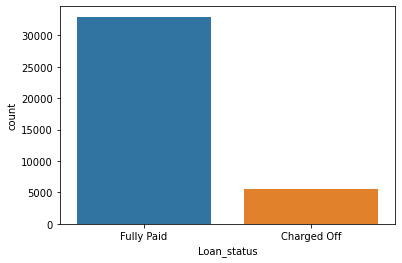

In [27]:
sns.countplot(df["Loan_status"])

#### 1. Analysing Funded Amount

(array([5031., 9964., 8140., 5061., 4083., 2840., 1093., 1384.,  395.,
         586.]),
 array([  500.,  3950.,  7400., 10850., 14300., 17750., 21200., 24650.,
        28100., 31550., 35000.]),
 <BarContainer object of 10 artists>)

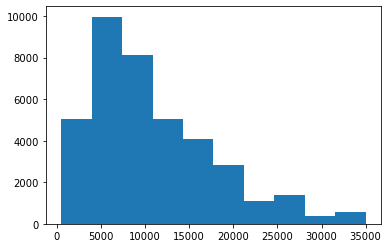

In [28]:
plt.hist(df["Funded_amnt"])

In [29]:
df["Funded_amnt_groups"] = pd.cut(x=df["Funded_amnt"],bins=7,labels= ["<5K","5K-10K","10K-15K","15K-20K","20K-25K","25K-30K",">30K"],precision = 2,ordered=True)

In [30]:
df.head()

,Funded_amnt,Term,Int_rate,Installment,Grade,Sub_grade,Emp_length,Home_ownership,Annual_inc,Verification_status,Issue_d,Loan_status,Purpose,Dti,Inq_last_6mths,Pub_rec_bankruptcies,Issue_Year,Issue_Month,Funded_amnt_groups
0,5000,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,1,0.0,2011,Dec,<5K
1,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,5,0.0,2011,Dec,<5K
2,2400,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,2,0.0,2011,Dec,<5K
3,10000,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,1,0.0,2011,Dec,5K-10K
5,5000,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,11.20,3,0.0,2011,Dec,<5K


Text(0.5, 0, 'Funded Amount for Non-Defaulters')

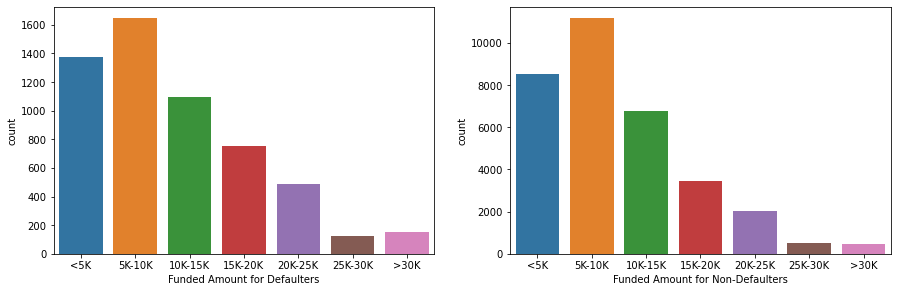

In [31]:
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(x='Funded_amnt_groups', data=df[df.Loan_status == 'Charged Off'])
plt.xlabel('Funded Amount for Defaulters')
plt.subplot(222)
sns.countplot(x='Funded_amnt_groups', data=df[df.Loan_status == 'Fully Paid'])
plt.xlabel('Funded Amount for Non-Defaulters')

### Insights
-  In general, most of the loans are taken for an amount between 5K to 10K   
-  Most loan defaulters have a loan for an amount between 5K to 10K

In [32]:
Funded_amnt_pivot = pd.pivot_table(data = df,index = "Funded_amnt_groups",columns = "Loan_status",values = "Funded_amnt",aggfunc = sum)
Funded_amnt_pivot_perc = Funded_amnt_pivot.apply(lambda x: x/x.sum(),axis = 1)

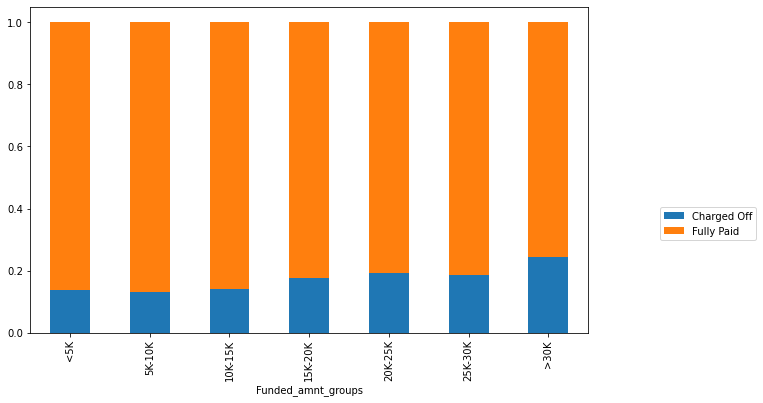

In [33]:
Funded_amnt_pivot_perc.plot(kind = "bar",stacked = 2,figsize = [10,6])
plt.legend(bbox_to_anchor=(1.31,0.4))

### Insights
- Proportion of loan defaults is highest for >30K funded amount group

### Recommendations
-  People asking for loans between 5K-10K and >30K must be properly scrutinised

#### 2. Analysing Term

Text(0.5, 0, 'Term for Non-Defaulters')

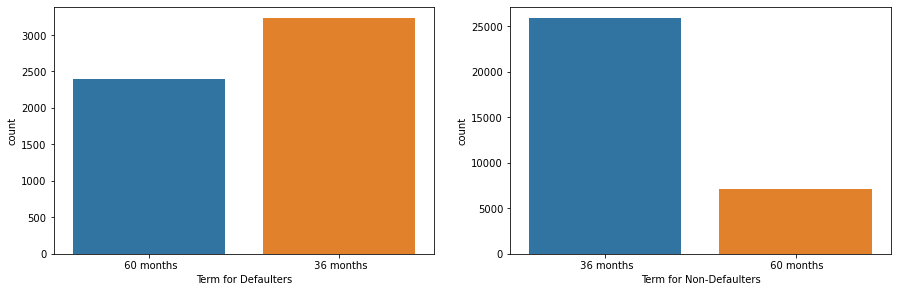

In [34]:
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(x='Term', data=df[df.Loan_status == 'Charged Off'])
plt.xlabel('Term for Defaulters')
plt.subplot(222)
sns.countplot(x='Term', data=df[df.Loan_status == 'Fully Paid'])
plt.xlabel('Term for Non-Defaulters')

### Insights
-  Most loan defaults happen for loan term of 36 months

#### 3. Analysing Interest rate

(array([8097., 8353., 3610., 5280., 4839., 4764., 2172.,  465.,  651.,
         346.]),
 array([  0. ,  36.9,  73.8, 110.7, 147.6, 184.5, 221.4, 258.3, 295.2,
        332.1, 369. ]),
 <BarContainer object of 10 artists>)

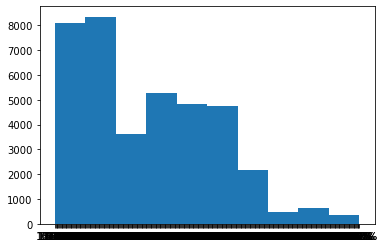

In [35]:
plt.hist(df["Int_rate"])

In [36]:
df["Int_rate"]=df["Int_rate"].apply(lambda x: float(x.rstrip("%")))
df['Int_rate_groups'] = pd.cut(df['Int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'],ordered=True)

In [37]:
df.Int_rate.dtype

dtype('float64')

In [38]:
df.head()

,Funded_amnt,Term,Int_rate,Installment,Grade,Sub_grade,Emp_length,Home_ownership,Annual_inc,Verification_status,Issue_d,Loan_status,Purpose,Dti,Inq_last_6mths,Pub_rec_bankruptcies,Issue_Year,Issue_Month,Funded_amnt_groups,Int_rate_groups
0,5000,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,1,0.0,2011,Dec,<5K,9%-13%
1,2500,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,5,0.0,2011,Dec,<5K,13%-17%
2,2400,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,2,0.0,2011,Dec,<5K,13%-17%
3,10000,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,1,0.0,2011,Dec,5K-10K,13%-17%
5,5000,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,11.20,3,0.0,2011,Dec,<5K,5%-9%


Text(0.5, 0, 'Interest rates for Non-Defaulters')

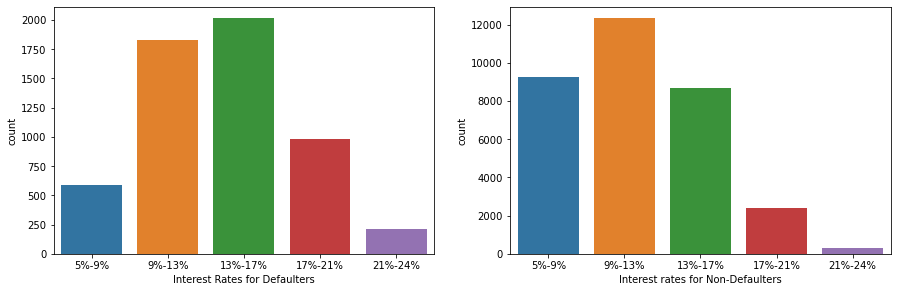

In [39]:
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(x='Int_rate_groups', data=df[df.Loan_status == 'Charged Off'])
plt.xlabel('Interest Rates for Defaulters')
plt.subplot(222)
sns.countplot(x='Int_rate_groups', data=df[df.Loan_status == 'Fully Paid'])
plt.xlabel('Interest rates for Non-Defaulters')

### Insights
-  Most loan defaulters took a loan at an interest rate between 13%-17%

In [40]:
Int_rate_pivot = pd.pivot_table(data = df,index = "Int_rate_groups",columns = "Loan_status",values = "Int_rate",aggfunc = sum)
Int_rate_pivot_perc = Int_rate_pivot.apply(lambda x: x/x.sum(),axis = 1)
Int_rate_pivot_perc

Loan_status,Charged Off,Fully Paid
Int_rate_groups,,
5%-9%,0.062086,0.937914
9%-13%,0.131349,0.868651
13%-17%,0.190169,0.809831
17%-21%,0.293002,0.706998
21%-24%,0.404438,0.595562


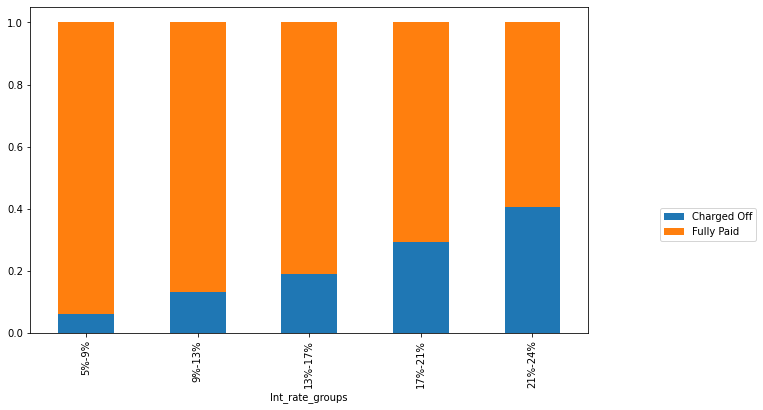

In [41]:
Int_rate_pivot_perc.plot(kind = "bar",stacked = 2,figsize = [10,6])
plt.legend(bbox_to_anchor=(1.31,0.4))

### Insights
-  Proportion of loan defaults is highest for 21%-24% interest rate group

In [42]:
list

['Funded_amnt',
 'Term',
 'Int_rate',
 'Installment',
 'Grade',
 'Sub_grade',
 'Emp_length',
 'Home_ownership',
 'Annual_inc',
 'Verification_status',
 'Issue_d',
 'Loan_status',
 'Purpose',
 'Dti',
 'Inq_last_6mths',
 'Pub_rec_bankruptcies',
 'Issue_Year',
 'Issue_Month']

#### 4. Analysing Installment

(array([ 7392., 11563.,  8963.,  4990.,  2518.,  1455.,  1267.,   217.,
          139.,    73.]),
 array([  15.69,  144.64,  273.59,  402.54,  531.49,  660.44,  789.39,
         918.34, 1047.29, 1176.24, 1305.19]),
 <BarContainer object of 10 artists>)

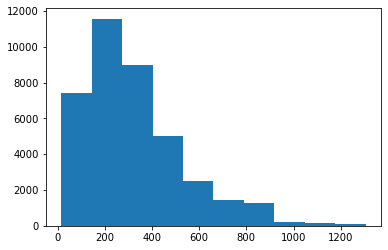

In [43]:
plt.hist(df["Installment"])

In [44]:
df.Installment.value_counts()

311.11    68
180.96    59
311.02    54
150.80    48
368.45    46
          ..
75.85      1
423.95     1
211.64     1
378.24     1
339.26     1
Name: Installment, Length: 15022, dtype: int64

In [45]:
df.Installment.min()

15.69

In [46]:
df.Installment.max()

1305.19

In [47]:
df['Installment_groups'] = pd.cut(df['Installment'], bins=10,labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])
df.head()

,Funded_amnt,Term,Int_rate,Installment,Grade,Sub_grade,Emp_length,Home_ownership,Annual_inc,Verification_status,...,Loan_status,Purpose,Dti,Inq_last_6mths,Pub_rec_bankruptcies,Issue_Year,Issue_Month,Funded_amnt_groups,Int_rate_groups,Installment_groups
0,5000,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,...,Fully Paid,credit_card,27.65,1,0.0,2011,Dec,<5K,9%-13%,145-274
1,2500,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,...,Charged Off,car,1.00,5,0.0,2011,Dec,<5K,13%-17%,14-145
2,2400,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,...,Fully Paid,small_business,8.72,2,0.0,2011,Dec,<5K,13%-17%,14-145
3,10000,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,...,Fully Paid,other,20.00,1,0.0,2011,Dec,5K-10K,13%-17%,274-403
5,5000,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,...,Fully Paid,wedding,11.20,3,0.0,2011,Dec,<5K,5%-9%,145-274


<AxesSubplot:xlabel='Installment_groups'>

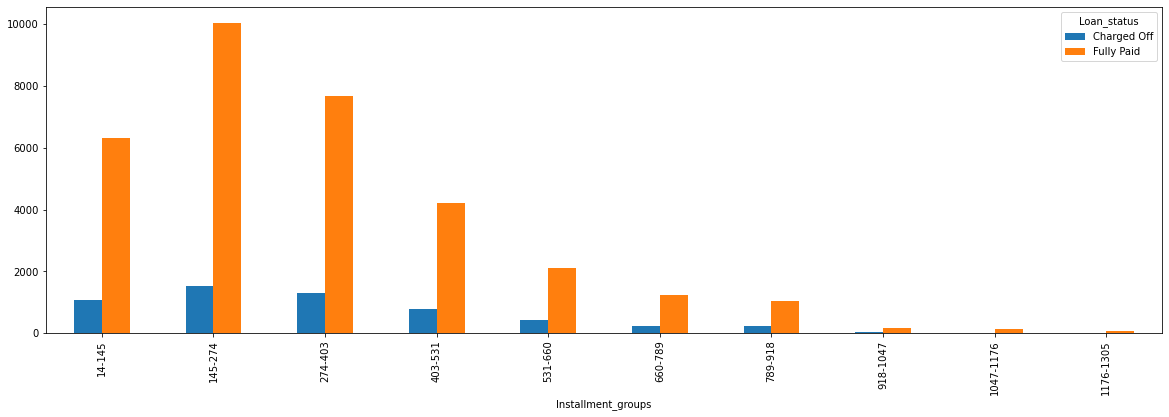

In [48]:
pd.crosstab(df.Installment_groups,df.Loan_status).plot(kind = "bar",figsize=(20,6))

### Insights
-  Loan defaults is highest for 145-274 installment group

#### 5. Analysing Sub-grade

In [49]:
df.Grade.value_counts()

B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: Grade, dtype: int64

In [50]:
df.Sub_grade.value_counts()

A4    2873
B3    2825
A5    2715
B5    2615
B4    2437
C1    2055
B2    2001
C2    1931
A3    1810
B1    1797
A2    1508
C3    1488
D2    1286
C4    1206
C5    1154
A1    1139
D3    1116
D1     931
D4     918
D5     834
E1     722
E2     614
E3     516
E4     424
E5     387
F1     305
F2     233
F3     174
F4     151
F5     113
G1      94
G2      77
G4      54
G3      45
G5      29
Name: Sub_grade, dtype: int64

In [51]:
df.Sub_grade = pd.to_numeric(df.Sub_grade.apply(lambda x : x[-1]))

<AxesSubplot:title={'center':'Grade wise defaulter disribution'}, xlabel='Grade', ylabel='count'>

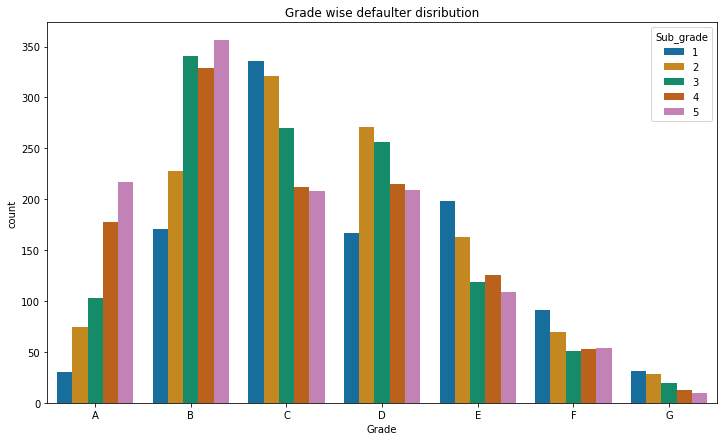

In [52]:
fig, ax = plt.subplots(figsize=(12,7))
sns.set_palette('colorblind')
plt.title("Grade wise defaulter disribution")
sns.countplot(x = 'Grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'Sub_grade',data = df[df.Loan_status == 'Charged Off'])

<AxesSubplot:title={'center':'Grade wise non-defaulter disribution'}, xlabel='Grade', ylabel='count'>

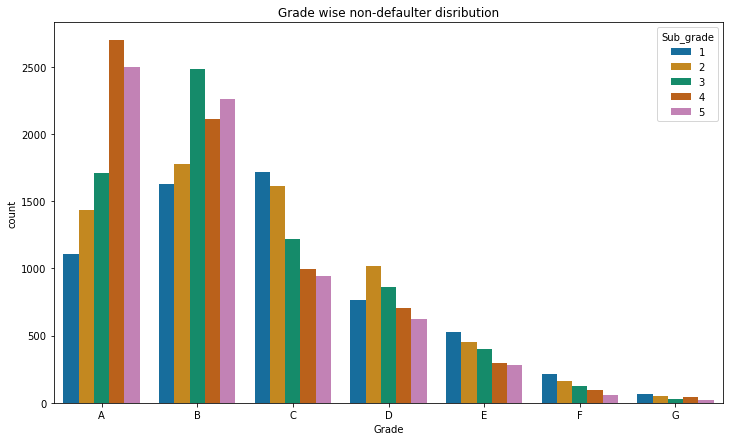

In [53]:
fig, ax = plt.subplots(figsize=(12,7))
sns.set_palette('colorblind')
plt.title("Grade wise non-defaulter disribution")
sns.countplot(x = 'Grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'Sub_grade',data = df[df.Loan_status == 'Fully Paid'])

### Insights
-  Top five categories in which defaults happen are: B5>B3>C1>B4>C2
-  Safest categories for lending: A4 and A5

#### 6. Analysing Employment length

<AxesSubplot:xlabel='Emp_length'>

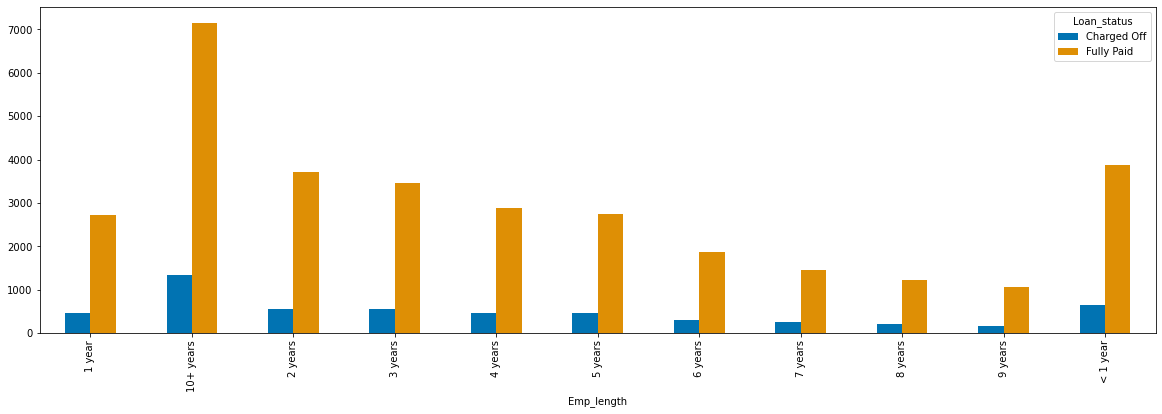

In [54]:
pd.crosstab(df.Emp_length,df.Loan_status).plot(kind = "bar",figsize=(20,6))

### Insights
-  People employed for 10+ years are most likely to default

#### 7. Analysing Home ownership

Text(0.5, 0, 'Home ownership for Non-Defaulters')

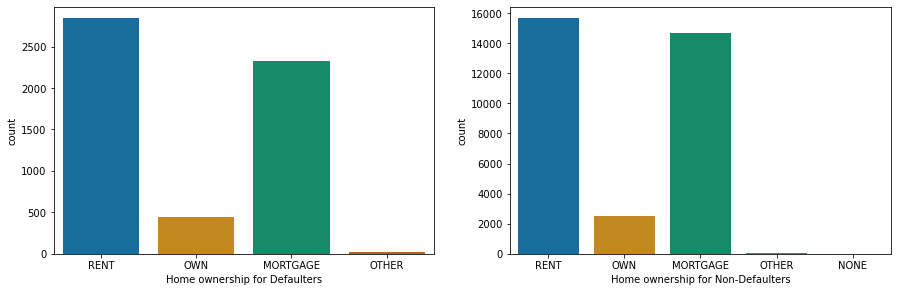

In [55]:
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(x='Home_ownership', data=df[df.Loan_status == 'Charged Off'])
plt.xlabel('Home ownership for Defaulters')
plt.subplot(222)
sns.countplot(x='Home_ownership', data=df[df.Loan_status == 'Fully Paid'])
plt.xlabel('Home ownership for Non-Defaulters')

### Insights
-  People living on rent are more likely to default

#### 8. Analysing Annual income

In [56]:
df.Annual_inc.nunique()

5215

In [57]:
df.Annual_inc.min()

4000.0

In [58]:
df.Annual_inc.max()

6000000.0

In [59]:
df.Annual_inc.dtype

dtype('float64')

In [60]:
df.Annual_inc.describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: Annual_inc, dtype: float64

In [61]:
df["Annual_inc_groups"]=pd.qcut(df["Annual_inc"],q=4,labels=["<40K","40K-59K","59K-82K",">82K"])

In [62]:
df.head()

,Funded_amnt,Term,Int_rate,Installment,Grade,Sub_grade,Emp_length,Home_ownership,Annual_inc,Verification_status,...,Purpose,Dti,Inq_last_6mths,Pub_rec_bankruptcies,Issue_Year,Issue_Month,Funded_amnt_groups,Int_rate_groups,Installment_groups,Annual_inc_groups
0,5000,36 months,10.65,162.87,B,2,10+ years,RENT,24000.0,Verified,...,credit_card,27.65,1,0.0,2011,Dec,<5K,9%-13%,145-274,<40K
1,2500,60 months,15.27,59.83,C,4,< 1 year,RENT,30000.0,Source Verified,...,car,1.00,5,0.0,2011,Dec,<5K,13%-17%,14-145,<40K
2,2400,36 months,15.96,84.33,C,5,10+ years,RENT,12252.0,Not Verified,...,small_business,8.72,2,0.0,2011,Dec,<5K,13%-17%,14-145,<40K
3,10000,36 months,13.49,339.31,C,1,10+ years,RENT,49200.0,Source Verified,...,other,20.00,1,0.0,2011,Dec,5K-10K,13%-17%,274-403,40K-59K
5,5000,36 months,7.90,156.46,A,4,3 years,RENT,36000.0,Source Verified,...,wedding,11.20,3,0.0,2011,Dec,<5K,5%-9%,145-274,<40K


In [63]:
df["Annual_inc_groups"].unique()

['<40K', '40K-59K', '59K-82K', '>82K']
Categories (4, object): ['<40K' < '40K-59K' < '59K-82K' < '>82K']

(array([0, 1, 2, 3]),
 [Text(0, 0, '<40K'),
  Text(1, 0, '40K-59K'),
  Text(2, 0, '59K-82K'),
  Text(3, 0, '>82K')])

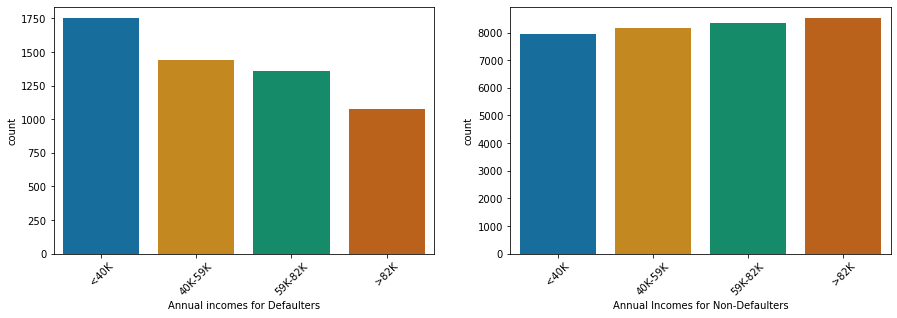

In [64]:
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(x='Annual_inc_groups', data=df[df.Loan_status == 'Charged Off'])
plt.xlabel('Annual incomes for Defaulters')
plt.xticks(rotation = 45)
plt.subplot(222)
sns.countplot(x='Annual_inc_groups', data=df[df.Loan_status == 'Fully Paid'])
plt.xlabel('Annual Incomes for Non-Defaulters')
plt.xticks(rotation = 45)

### Insights
-  People falling in the first quartile of annual income (<40K) are most likely to default

#### 9. Analysing Verification status

In [65]:
df.Verification_status.value_counts()

Not Verified       16694
Verified           12206
Source Verified     9677
Name: Verification_status, dtype: int64

In [66]:
df.Verification_status = df.Verification_status.apply(lambda x: "Verified" if x=="Source Verified" else x)

In [67]:
df.Verification_status.value_counts()

Verified        21883
Not Verified    16694
Name: Verification_status, dtype: int64

<AxesSubplot:xlabel='Verification_status', ylabel='count'>

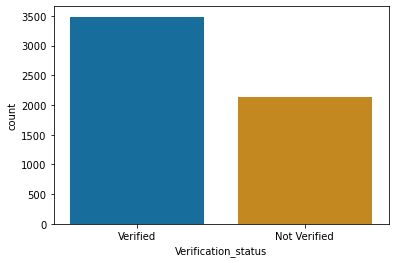

In [68]:
sns.countplot(x ='Verification_status', data=df[df.Loan_status == 'Charged Off'])

### Insights
-  Quite interestingly, most people who defaulted on loan had their income/source of income **verified** at the time of loan grant.

#### 10. Analysing Purpose

<AxesSubplot:xlabel='count', ylabel='Purpose'>

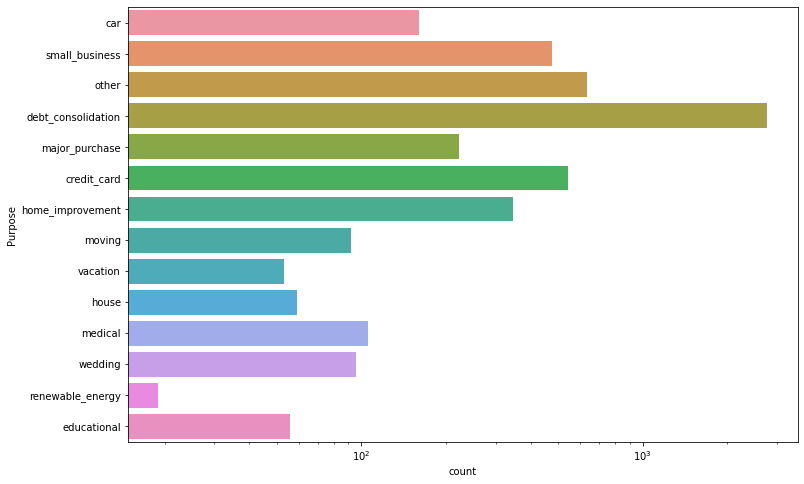

In [69]:
fig, ax = plt.subplots(figsize = (12,8))
ax.set(xscale = 'log')
sns.countplot(y ='Purpose', data=df[df.Loan_status == 'Charged Off'])

### Insights
-  Most people who defaulted took the loan for the purpose of Debt consolidation.

#### 11. Analysing Debt to Income(DTI) ratio

In [70]:
df.Dti.dtype

dtype('float64')

In [71]:
df.Dti.min()

0.0

In [72]:
df.Dti.max()

29.99

In [73]:
df.Dti.describe()

count    38577.000000
mean        13.272727
std          6.673044
min          0.000000
25%          8.130000
50%         13.370000
75%         18.560000
max         29.990000
Name: Dti, dtype: float64

(array([ 6372., 10242., 11349.,  8918.,  1696.]),
 array([ 0.   ,  5.998, 11.996, 17.994, 23.992, 29.99 ]),
 <BarContainer object of 5 artists>)

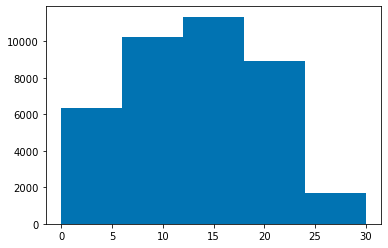

In [74]:
plt.hist(df.Dti,bins = 5)

In [75]:
df["Dti_groups"]=pd.qcut(df["Dti"],q=4)

In [76]:
df.head()

,Funded_amnt,Term,Int_rate,Installment,Grade,Sub_grade,Emp_length,Home_ownership,Annual_inc,Verification_status,...,Dti,Inq_last_6mths,Pub_rec_bankruptcies,Issue_Year,Issue_Month,Funded_amnt_groups,Int_rate_groups,Installment_groups,Annual_inc_groups,Dti_groups
0,5000,36 months,10.65,162.87,B,2,10+ years,RENT,24000.0,Verified,...,27.65,1,0.0,2011,Dec,<5K,9%-13%,145-274,<40K,"(18.56, 29.99]"
1,2500,60 months,15.27,59.83,C,4,< 1 year,RENT,30000.0,Verified,...,1.00,5,0.0,2011,Dec,<5K,13%-17%,14-145,<40K,"(-0.001, 8.13]"
2,2400,36 months,15.96,84.33,C,5,10+ years,RENT,12252.0,Not Verified,...,8.72,2,0.0,2011,Dec,<5K,13%-17%,14-145,<40K,"(8.13, 13.37]"
3,10000,36 months,13.49,339.31,C,1,10+ years,RENT,49200.0,Verified,...,20.00,1,0.0,2011,Dec,5K-10K,13%-17%,274-403,40K-59K,"(18.56, 29.99]"
5,5000,36 months,7.90,156.46,A,4,3 years,RENT,36000.0,Verified,...,11.20,3,0.0,2011,Dec,<5K,5%-9%,145-274,<40K,"(8.13, 13.37]"


Text(0.5, 0, 'DTI for Non-Defaulters')

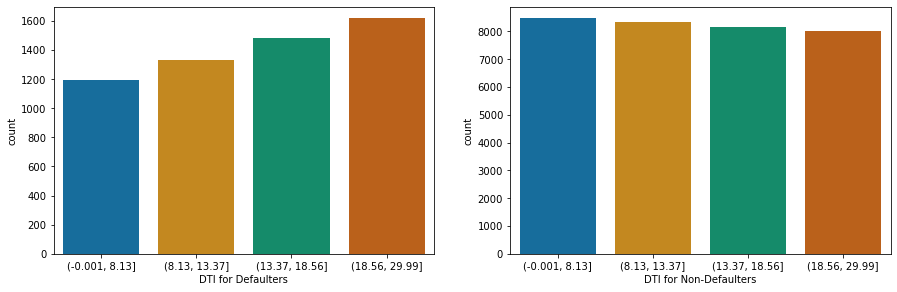

In [77]:
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(x='Dti_groups', data=df[df.Loan_status == 'Charged Off'])
plt.xlabel('DTI for Defaulters')
plt.subplot(222)
sns.countplot(x='Dti_groups', data=df[df.Loan_status == 'Fully Paid'])
plt.xlabel('DTI for Non-Defaulters')

### Insights
-  Most people who defaulted have a DTI lying in the fourth quartile i.e. 18% to 30% of the monthly income of these people go into their total monthly debt payments

#### 12. Analysing Inquiries for last 6 months 

In [78]:
df.Inq_last_6mths.value_counts()

0    18709
1    10660
2     5654
3     2983
4      316
5      144
6       63
7       34
8       14
Name: Inq_last_6mths, dtype: int64

Text(0.5, 0, 'Inquiry status for Non-Defaulters')

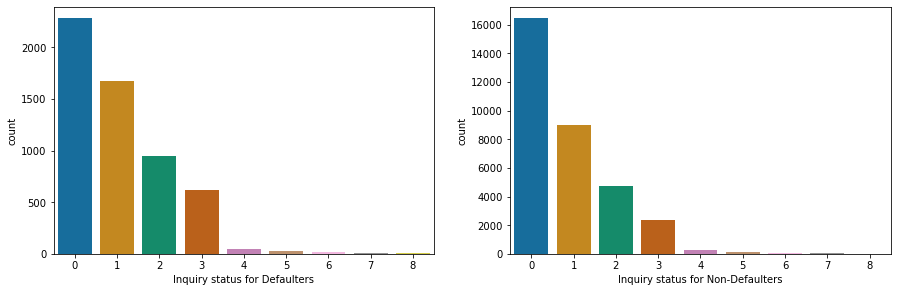

In [79]:
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(data=df[df.Loan_status=="Charged Off"],x ="Inq_last_6mths")
plt.xlabel('Inquiry status for Defaulters')
plt.subplot(222)
sns.countplot(data=df[df.Loan_status=="Fully Paid"],x ="Inq_last_6mths")
plt.xlabel('Inquiry status for Non-Defaulters')

### Insights
-  Inquiry status does not seem to drive the loan defult tendency of people. In general,most people do least inquiries before applying for a loan.

#### 13. Analysing Public record bankruptcies

Text(0.5, 0, 'Public record bankruptcies status for Non-Defaulters')

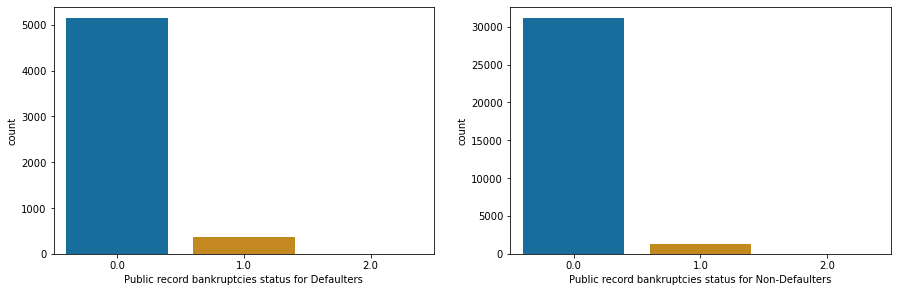

In [80]:
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(data=df[df.Loan_status=="Charged Off"],x ="Pub_rec_bankruptcies")
plt.xlabel('Public record bankruptcies status for Defaulters')
plt.subplot(222)
sns.countplot(data=df[df.Loan_status=="Fully Paid"],x ="Pub_rec_bankruptcies")
plt.xlabel('Public record bankruptcies status for Non-Defaulters')

### Insights
-  In general,most people who apply for a loan do not have any prior public record of bankruptcies.

#### 14. Analysing Loan Issue date & year

Text(0.5, 0, 'Month wise status for Non-Defaulters')

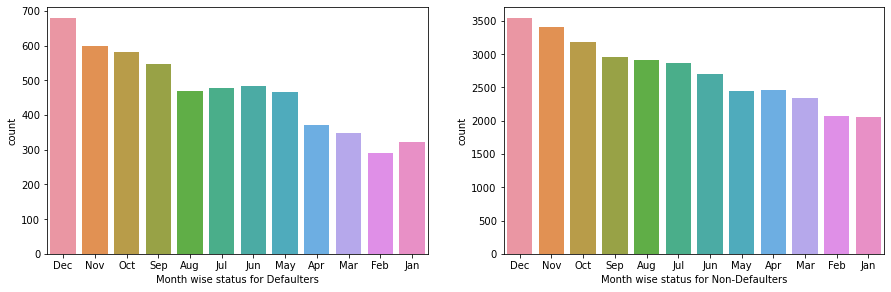

In [81]:
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(data=df[df.Loan_status=="Charged Off"],x ="Issue_Month")
plt.xlabel('Month wise status for Defaulters')
plt.subplot(222)
sns.countplot(data=df[df.Loan_status=="Fully Paid"],x ="Issue_Month")
plt.xlabel('Month wise status for Non-Defaulters')

Text(0.5, 0, 'Year wise status for Non-Defaulters')

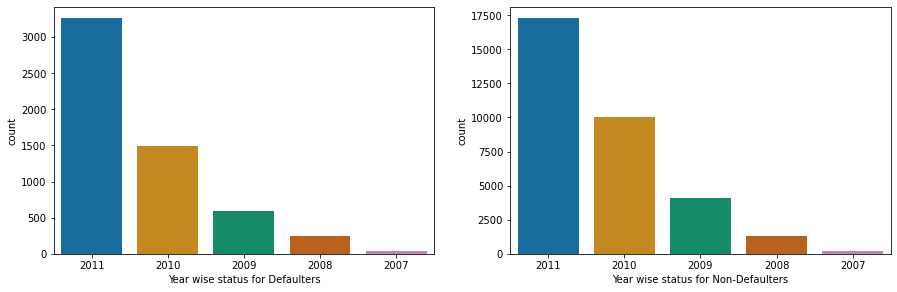

In [82]:
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(data=df[df.Loan_status=="Charged Off"],x ="Issue_Year")
plt.xlabel('Year wise status for Defaulters')
plt.subplot(222)
sns.countplot(data=df[df.Loan_status=="Fully Paid"],x ="Issue_Year")
plt.xlabel('Year wise status for Non-Defaulters')

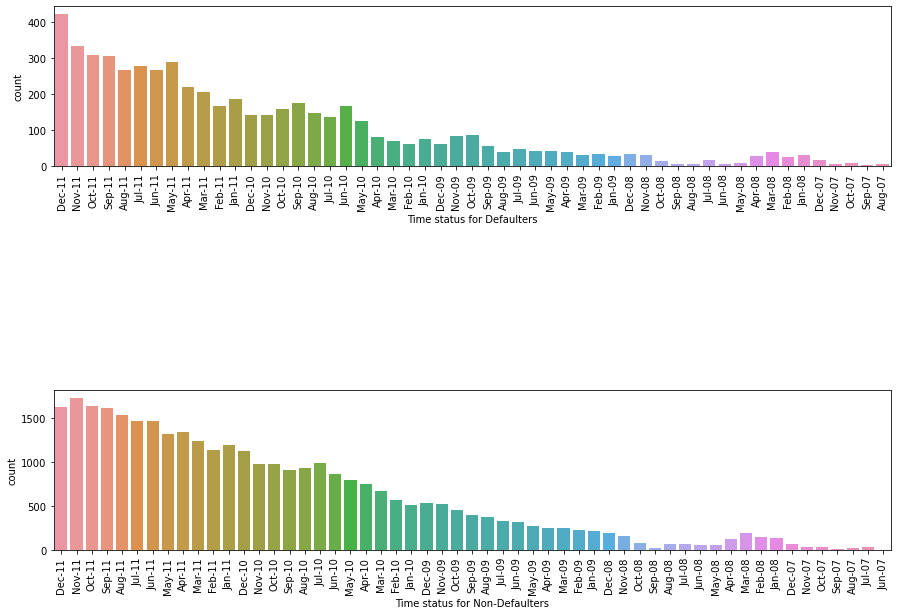

In [83]:
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(311)
sns.countplot(data=df[df.Loan_status=="Charged Off"],x ="Issue_d")
plt.xlabel('Time status for Defaulters')
plt.xticks(rotation=90)
plt.subplot(313)
sns.countplot(data=df[df.Loan_status=="Fully Paid"],x ="Issue_d")
plt.xlabel('Time status for Non-Defaulters')
plt.xticks(rotation=90)
plt.show()

### Insights
-  Most loans that defaulted were issued in the month of Dec 2011

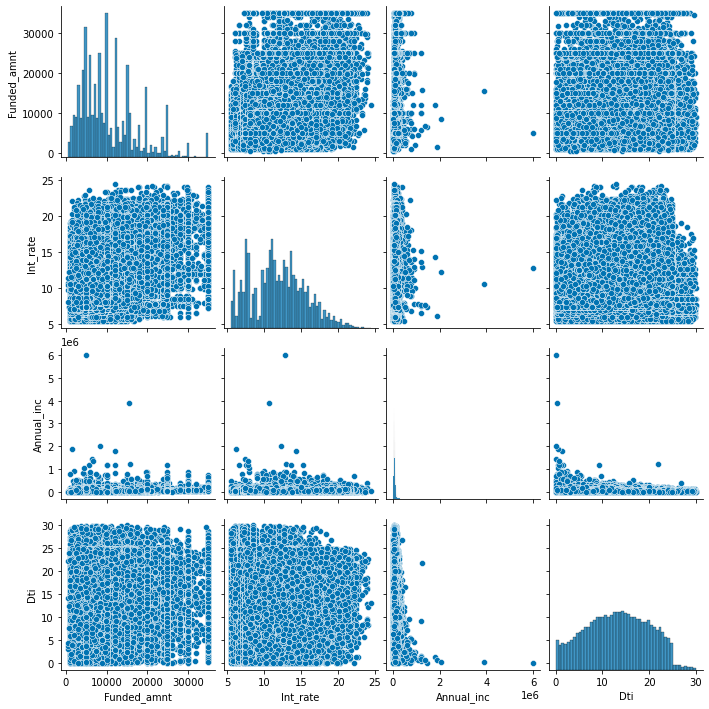

In [84]:
sns.pairplot(df[["Funded_amnt","Int_rate","Annual_inc","Dti"]])
# No linear correlation seems to be present among the numerical variables

In [85]:
df3 = df[(df.Loan_status=="Charged Off")].groupby(by = ["Issue_d","Annual_inc_groups"]).Purpose.value_counts().sort_values(ascending = False)
df3.head()

Issue_d  Annual_inc_groups  Purpose           
Dec-11   40K-59K            debt_consolidation    75
         <40K               debt_consolidation    67
         59K-82K            debt_consolidation    66
Nov-11   <40K               debt_consolidation    56
         59K-82K            debt_consolidation    52
Name: Purpose, dtype: int64

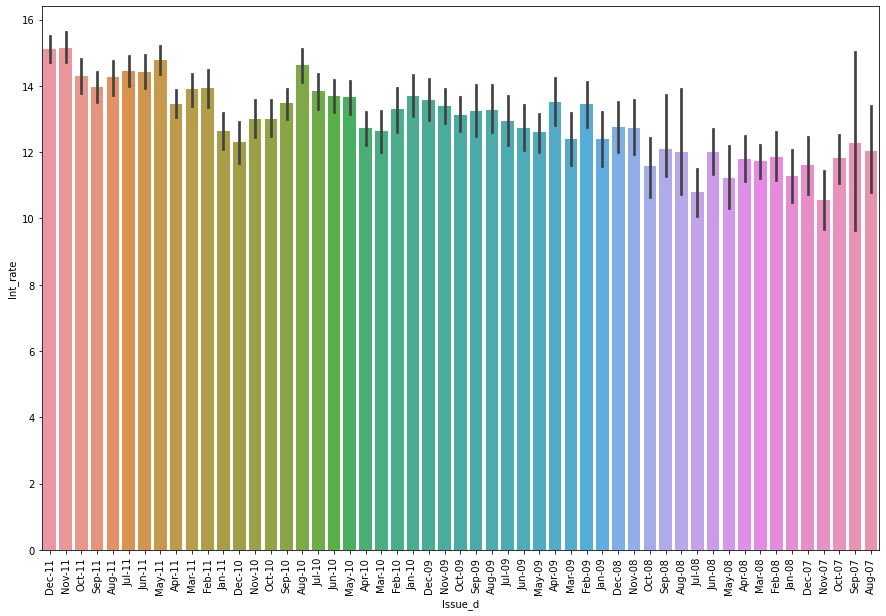

In [86]:
plt.figure(figsize = (15,10))
sns.barplot(data=df[df.Loan_status=="Charged Off"],x="Issue_d",y = "Int_rate")
plt.xticks(rotation=90)
plt.show()

### Insights
-  Average Interest rates were the highest for the months of Nov 2011 followed by Dec 2011
-  This seems to be a case for causation wherein higher interest rates increased the possibility of default. May be the base    interest rate was kept higher depending on the market conditions for the months of Nov & Dec 2011, that caused the net interest rate to increase and inturn, the number of defaults also increased

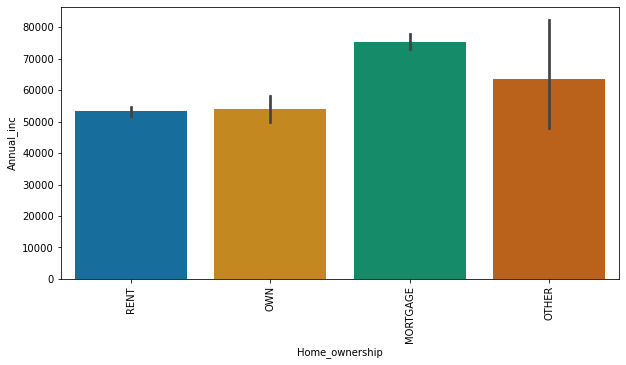

In [87]:
plt.figure(figsize = (10,5))
sns.barplot(data=df[df.Loan_status=="Charged Off"],x="Home_ownership",y = "Annual_inc")
plt.xticks(rotation=90)
plt.show()

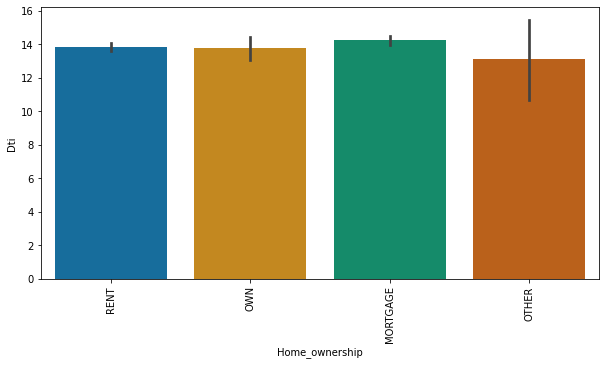

In [88]:
plt.figure(figsize = (10,5))
sns.barplot(data=df[df.Loan_status=="Charged Off"],x="Home_ownership",y = "Dti")
plt.xticks(rotation=90)
plt.show()

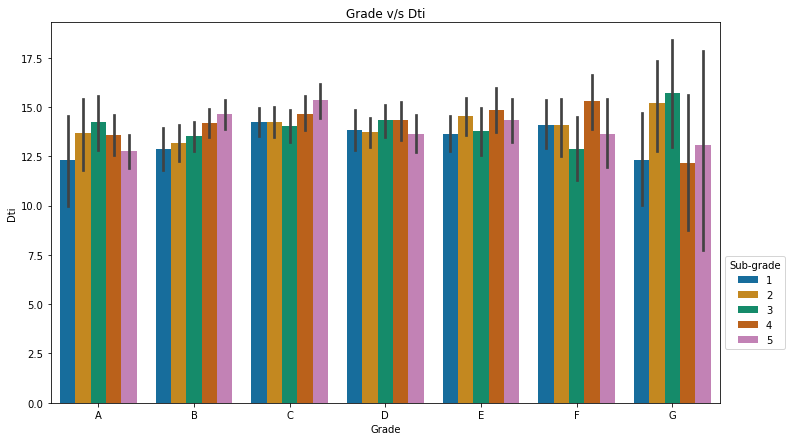

In [89]:
fig, ax = plt.subplots(figsize=(12,7))
sns.set_palette('colorblind')
plt.title("Grade v/s Dti")
sns.barplot(x = 'Grade', y = "Dti" , hue = 'Sub_grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'],data = df[df.Loan_status == 'Charged Off'])
plt.legend(bbox_to_anchor=(1,0.4),title = "Sub-grade")

(array([0, 1, 2, 3]),
 [Text(0, 0, '<40K'),
  Text(1, 0, '40K-59K'),
  Text(2, 0, '59K-82K'),
  Text(3, 0, '>82K')])

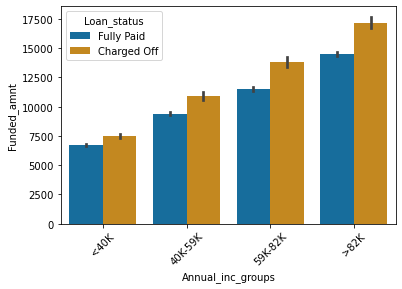

In [90]:
sns.barplot(x = "Annual_inc_groups", y = "Funded_amnt", hue = 'Loan_status', data = df)
plt.xticks(rotation = 45)

### Insights
-  Higher income groups get the highest amounts funded

<Figure size 1440x720 with 0 Axes>

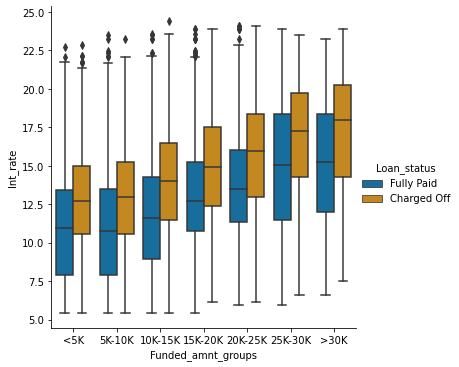

In [91]:
plt.figure(figsize = (20,10))
sns.catplot(data =df,y ='Int_rate', x ='Funded_amnt_groups', hue ='Loan_status',kind = 'box')

### Insights
-  Interest rates are higher for "Charged off" category across all Funded amount groups

In [92]:
df[df.Loan_status == "Charged Off"].Int_rate.describe()

count    5627.000000
mean       13.820432
std         3.654413
min         5.420000
25%        11.310000
50%        13.610000
75%        16.400000
max        24.400000
Name: Int_rate, dtype: float64

In [93]:
df[df.Loan_status == "Fully Paid"].Int_rate.describe()

count    32950.000000
mean        11.609761
std          3.599964
min          5.420000
25%          8.490000
50%         11.490000
75%         13.990000
max         24.110000
Name: Int_rate, dtype: float64

In [94]:
df1 = df[df.Loan_status == "Charged Off"].groupby(by = "Issue_d").Int_rate.mean().sort_values(ascending = False)
df1.head()

Issue_d
Nov-11    15.149851
Dec-11    15.117541
May-11    14.770623
Aug-10    14.627838
Jul-11    14.453561
Name: Int_rate, dtype: float64

In [95]:
df2 = df[df.Loan_status == "Fully Paid"].groupby(by = "Issue_d").Int_rate.mean().sort_values(ascending = False)
df2.head()

Issue_d
Jun-07    13.750000
Dec-11    12.530124
Mar-09    12.518694
Feb-09    12.510000
Aug-10    12.430409
Name: Int_rate, dtype: float64

### Insights
Considering the above details:
>1. Mean value of interest is higher for the Charged Off category across all Funded amount groups
>2. Median value of interest is higher for the Charged Off category across all Funded amount groups
>3. Average Interest rates were highest for the months of Nov & Dec 2011 within the Charged off category as well as when compared to Fully paid category

In [96]:
df3 = df[df.Loan_status=="Charged Off"].groupby(by = "Issue_d").Grade.value_counts().sort_values(ascending = False)
df3.head()

Issue_d  Grade
Dec-11   B        102
         C         90
Nov-11   B         87
Oct-11   B         79
Sep-11   C         79
Name: Grade, dtype: int64

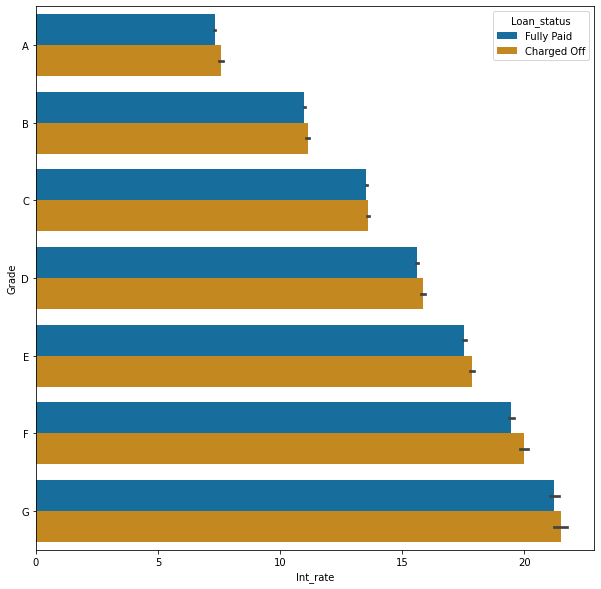

In [97]:
plt.figure(figsize=(10,10))
sns.barplot(data =df,x='Int_rate', y='Grade', hue ='Loan_status',order=['A','B','C','D','E','F','G'])
plt.show()

### Insights
-  Higher the grade, higher is the applicable interest.

<Figure size 1440x720 with 0 Axes>

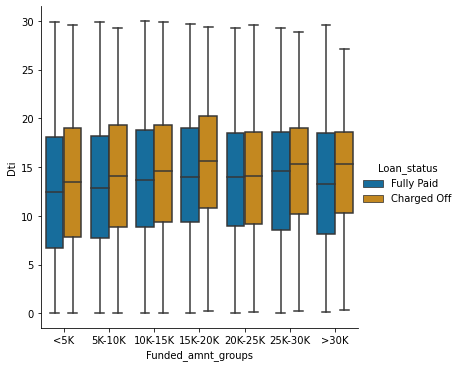

In [98]:
plt.figure(figsize = (20,10))
sns.catplot(data =df,y ='Dti', x ='Funded_amnt_groups', hue ='Loan_status',kind = 'box')

In [99]:
df[df.Loan_status == "Charged Off"].Dti.describe()

count    5627.000000
mean       14.000624
std         6.585577
min         0.000000
25%         9.050000
50%        14.290000
75%        19.290000
max        29.850000
Name: Dti, dtype: float64

In [100]:
df[df.Loan_status == "Fully Paid"].Dti.describe()

count    32950.000000
mean        13.148421
std          6.680041
min          0.000000
25%          7.980000
50%         13.200000
75%         18.390000
max         29.990000
Name: Dti, dtype: float64

### Insights
Looking at the above three pieces of information, we can conclude that Dti is higher for Charged Off category across all Funded amount groups

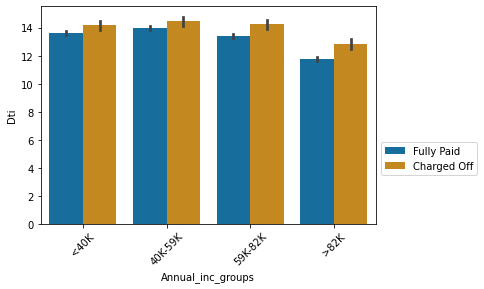

In [101]:
sns.barplot(x = "Annual_inc_groups", y = "Dti", hue = 'Loan_status', data = df)
plt.xticks(rotation = 45)
plt.legend(bbox_to_anchor=(1,0.4))

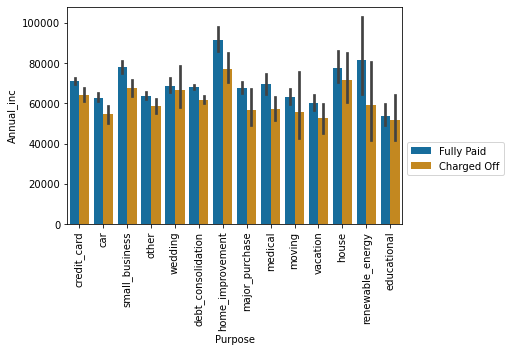

In [102]:
sns.barplot(y = "Annual_inc", x = "Purpose", hue = 'Loan_status', data = df)
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor=(1,0.4))

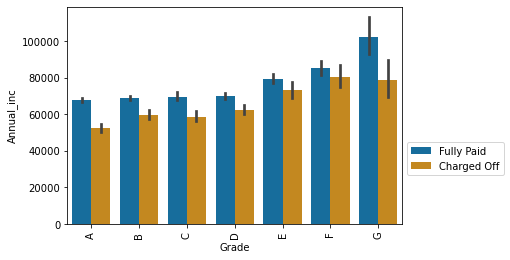

In [103]:
sns.barplot(y = "Annual_inc", x = "Grade", hue = 'Loan_status', order=['A','B','C','D','E','F','G'],data = df)
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor=(1,0.4))

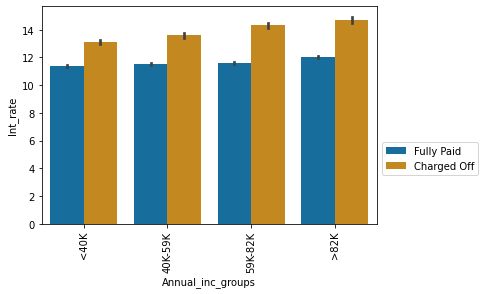

In [104]:
sns.barplot(x = "Annual_inc_groups", y = "Int_rate", hue = 'Loan_status', data = df)
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor=(1,0.4))

In [105]:
df3 = df[df.Loan_status=="Charged Off"].groupby(by = "Issue_d").Annual_inc_groups.value_counts().sort_values(ascending = False)
df3.head()

Issue_d  Annual_inc_groups
Dec-11   40K-59K              121
         59K-82K              120
         <40K                 112
Nov-11   <40K                 104
May-11   <40K                  97
Name: Annual_inc_groups, dtype: int64

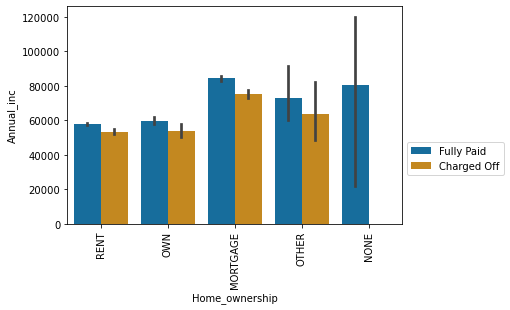

In [106]:
sns.barplot(y = "Annual_inc", x = "Home_ownership", hue = 'Loan_status', data = df)
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor=(1,0.4))

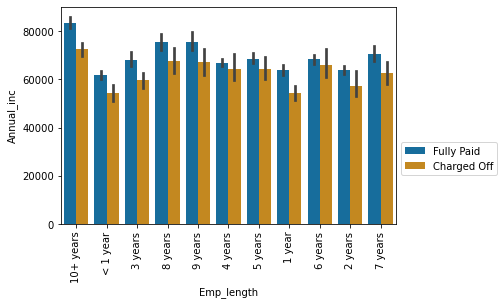

In [107]:
sns.barplot(y = "Annual_inc", x = "Emp_length", hue = 'Loan_status', data = df)
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor=(1,0.4))

### Insights
Looking at the above pieces of information, there are interesting insights about the **Loan Defaulters in 59K-82K income group**:
1. Most loans taken in Dec 2011 (120) belonged to this income group
2. This group fell in Grade E,F and G, which implies that higher interest rate (Average 14%) was levied up on
3. Most loans were taken for the purpose of Home Improvement, followed  by house and then small business
4. People in this group do not own a home or stay in rented place. Instead, they have a home on mortgage i.e. they have an ongoing home loan or belong to Other category
5. DTI is also the highest for this group (Average 14%), which implies about 14% of their monthly income goes into debt payments
6. The defaulters with employment length of 10+ years belong to this income group
### **It seems that most loans were actually taken for debt payment for the ongoing home loans**